In [2]:
import pandas

# Import the data

data = pandas.read_csv("WineData.csv")

data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0,0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11,25,15,17
total_sulfur_dioxide,34,67,54,60
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [3]:
print(data.shape)

print(data.dtypes)

(6497, 13)
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object


In [12]:
print(len(data[data['color'] == 'red']))
print(len(data[data['color'] == 'white']))

1599
4898


In [15]:
for x in set(data['quality']):
    print( x , ': ' , len( data[data['quality'] == x] ) )

3 :  30
4 :  216
5 :  2138
6 :  2836
7 :  1079
8 :  193
9 :  5


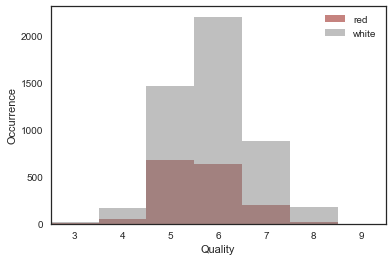

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

# custom colors
red = sns.color_palette()[2]
white = 'gray'

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')

In [18]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# Use o método que gera a matriz de correlação
corr_mat = data[float_columns].corr()

# Deixe os elementos da diagonal como 0.0
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0 
    
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [57]:
# Aplique o método da função absoluta e que retorna o id com máxima correlação
print(corr_mat.abs().max().idxmax())
print(corr_mat.max())
#
#Maior correlação é entre free_sulfur_dioxide e total_sulfur_dioxide
#


free_sulfur_dioxide
fixed_acidity           0.458910
volatile_acidity        0.377124
citric_acid             0.324436
residual_sugar          0.552517
chlorides               0.395593
free_sulfur_dioxide     0.720934
total_sulfur_dioxide    0.720934
density                 0.552517
pH                      0.261454
sulphates               0.395593
alcohol                 0.121248
dtype: float64


In [58]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [59]:
# Que função aplicamos nesse caso?
for col in skew_columns.index.tolist():
    data[col] = print(data[col])
    
#Não faço absolutamente a menor ideia do que 'skew' faz. 

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
6467    0.046
6468    0.032
6469    0.021
6470    0.015
6471    0.032
6472    0.030
6473    0.048
6474    0.035
6475    0.038
6476    0.032
6477    0.035
6478    0.046
6479    0.046
6480    0.030
6481    0.037
6482    0.035
6483    0.048
6484    0.046
6485    0.028
6486    0.023
6487    0.052
6488    0.030
6489    0.036
6490    0.038
6491    0.032
6492    0.039
6493    0.047
6494    0.041
6495    0.022
6496    0.020
Name: chlorides, Length: 6497, dtype: float64
0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
5       0.56
6       0.46
7       0

In [ ]:
#Não executa certo
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(skew_columns)

data.head(4)

TypeError: unorderable types: NoneType() <= NoneType()

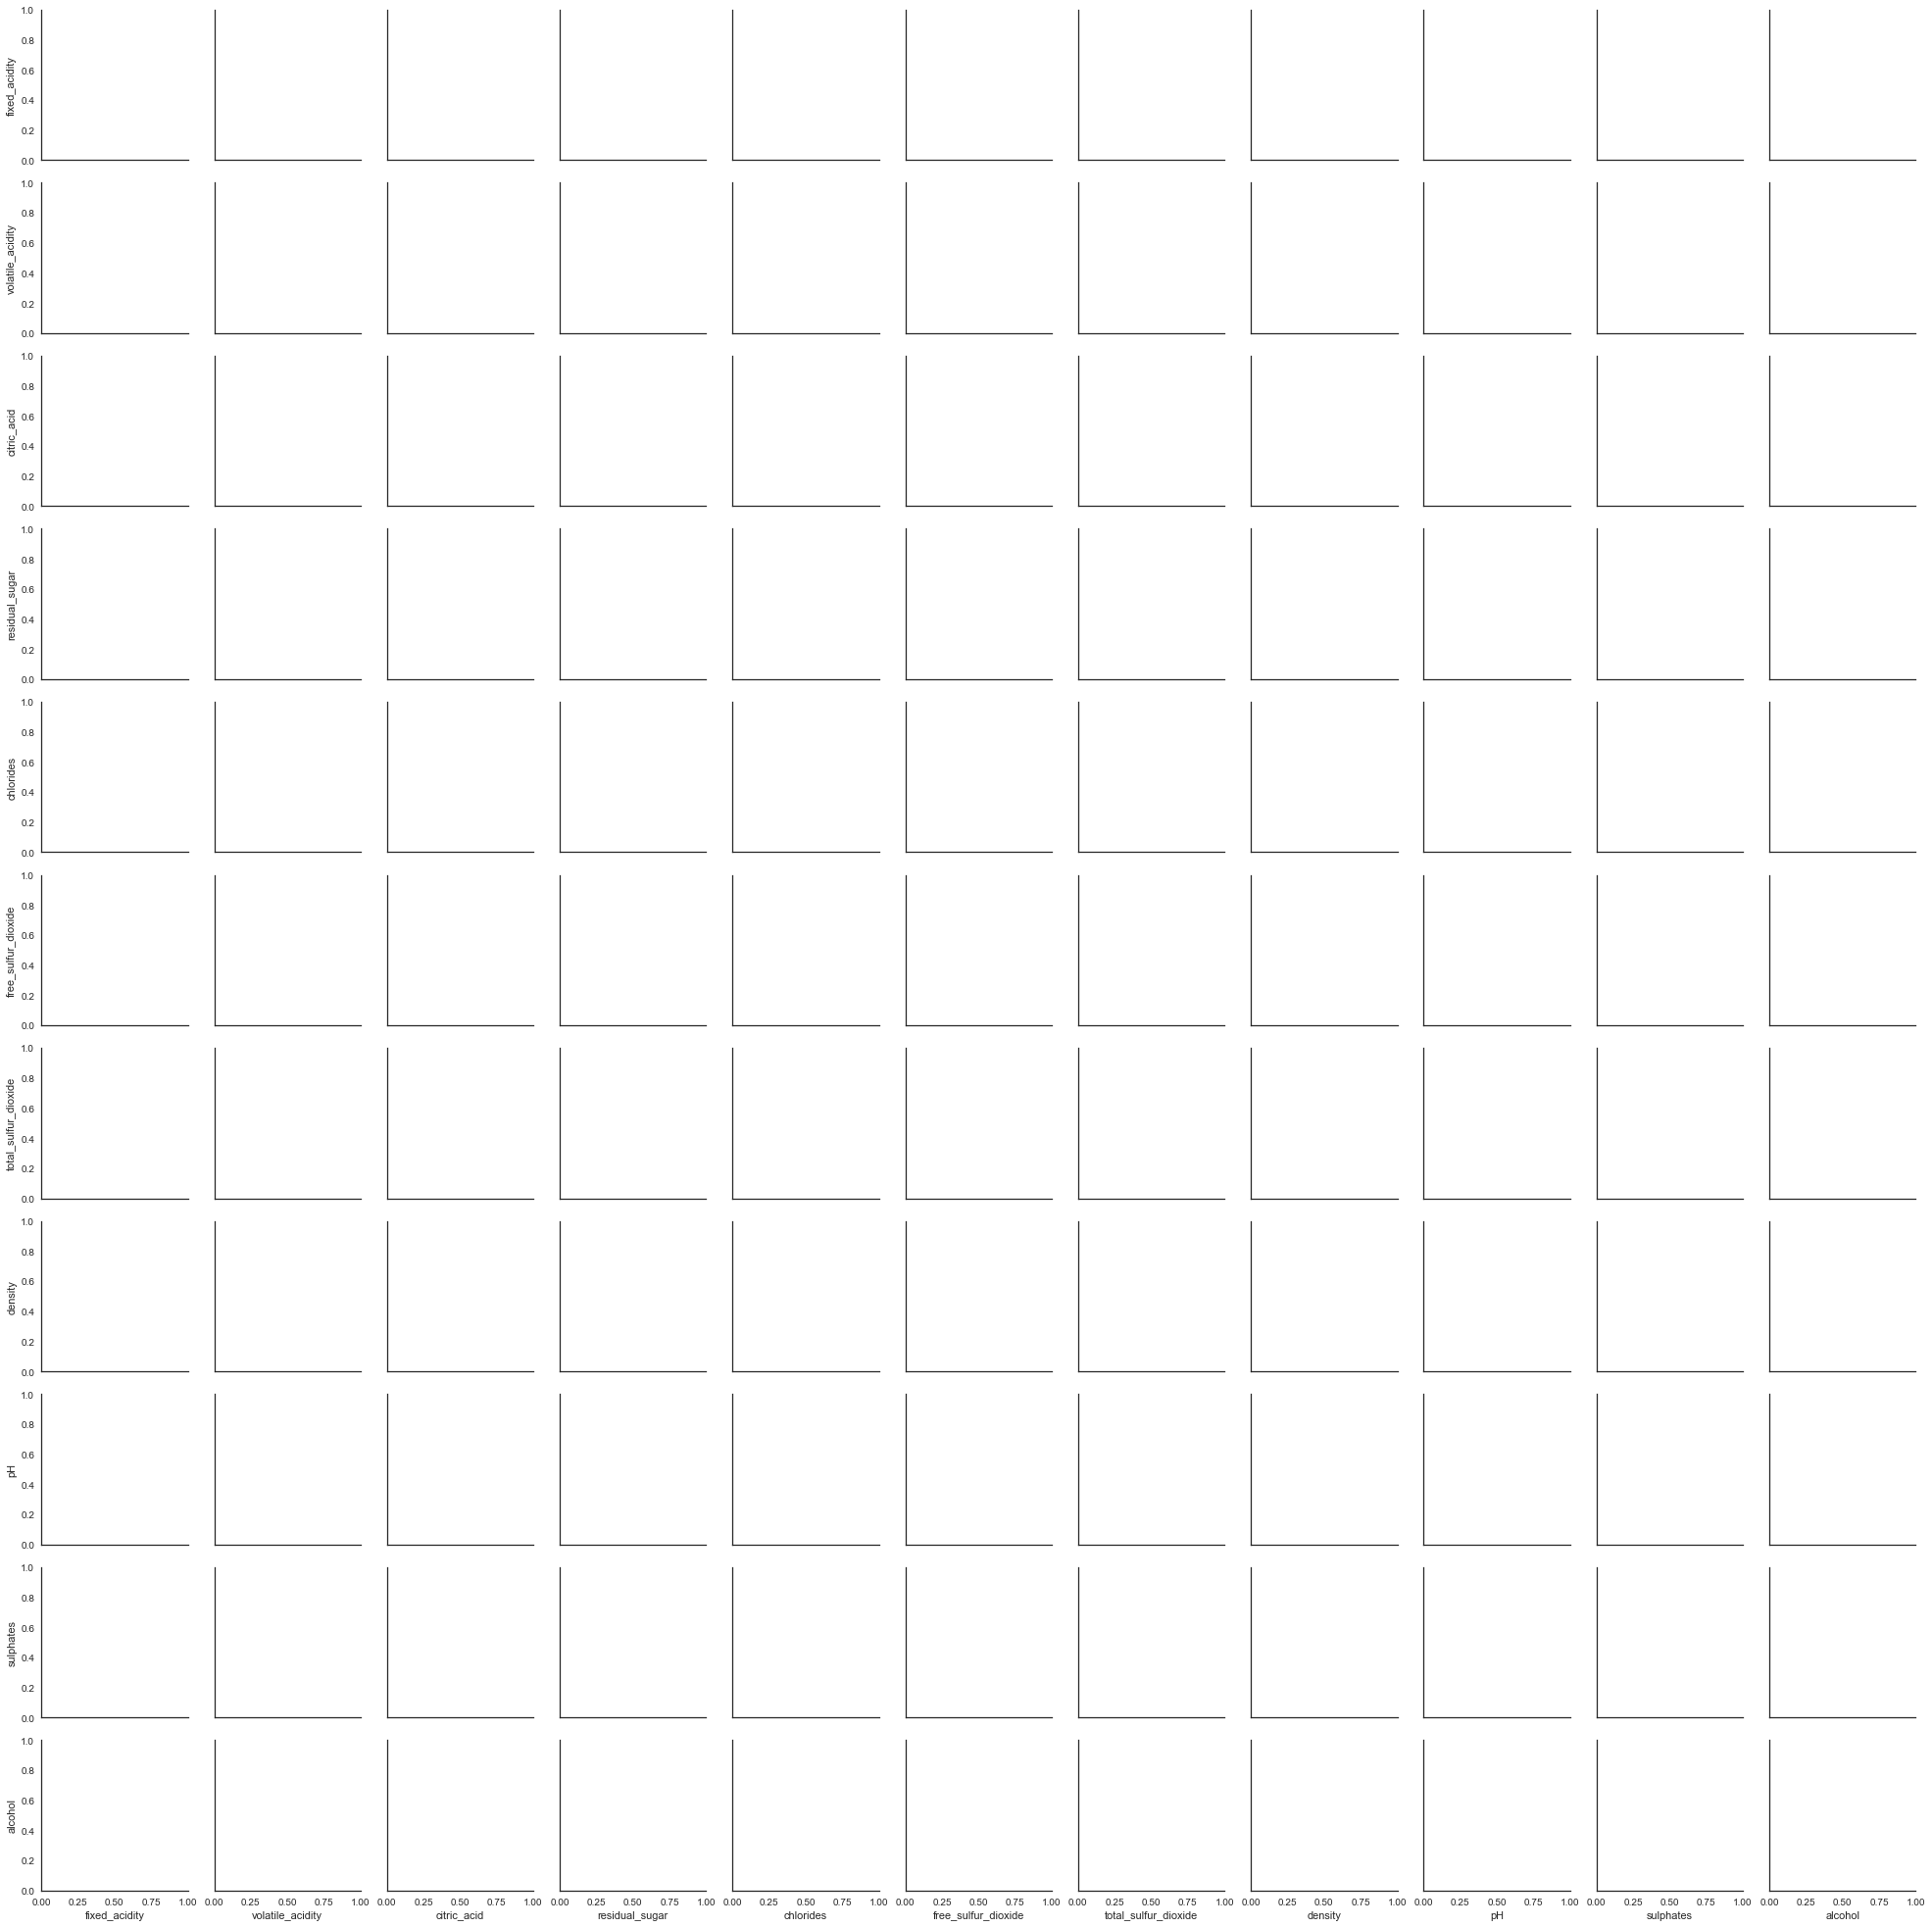

In [66]:
#Não Executa Certo
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});

In [68]:
from sklearn.cluster import KMeans
#Enrolei no tratamento pelo Skew, continuar o exercício usando os dados originais
data2 = pandas.read_csv("WineData.csv")

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data2)

data2['kmeans'] = km.predict(data2)

ValueError: could not convert string to float: 'white'